#Importer fichiers

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
from google.colab import auth
auth.authenticate_user()
import gspread
from oauth2client.client import GoogleCredentials
gc = gspread.authorize(GoogleCredentials.get_application_default())

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
wb = gc.open_by_url('https://docs.google.com/spreadsheets/d/1nCdB3_FDoCm1cflXQQxwdPHuYDaf3kBfx6SfjQV8gPo/edit#gid=1963435622')
wt = gc.open_by_url('https://docs.google.com/spreadsheets/d/1PvUXil1f3fp-RJaOrOYEuwIRIH9QePJhr9C9iDZvXoA/edit#gid=0')

In [0]:
sheet = wb.worksheet('GlobalLandTemperaturesByCountry')
paper = wt.worksheet('ToutesCatastrophesNaturelles')

In [0]:
data = sheet.get_all_values()

In [0]:
data1 = paper.get_all_values()

In [0]:
df_temperature = pd.DataFrame(data)

In [0]:
df_catatrophes = pd.DataFrame(data1)

# Traiter deux dataframes

## Temperature

In [0]:
# Retravailler les indexes
# Méthode de Karine
df_temperature.columns = df_temperature.iloc[0]
df_temperature = df_temperature.iloc[1:]
df_temperature.reset_index(drop=True, inplace=True)

In [0]:
#créer la colonne Year
df_temperature['Year'] = df_temperature['dt'].apply(lambda x: x[0:4])

In [0]:
#convertir type colonne AverageTemperature en type numérique
# solution de Karine
df_temperature['AverageTemperature'] = pd.to_numeric(df_temperature['AverageTemperature'], errors='coerce')

In [0]:
# supprimer les NaN
df_temperature = df_temperature.dropna()

In [0]:
df_temperature = df_temperature.reset_index()

In [0]:
df_temperature.drop(['index' ,'dt', 'AverageTemperatureUncertainty'], axis=1, inplace= True)

In [0]:
df_temperature.head()

0  AverageTemperature Country  Year
0               4.384   Åland  1743
1               1.530   Åland  1744
2               6.702   Åland  1744
3              11.609   Åland  1744
4              15.342   Åland  1744

In [0]:
#Créer un nouveau dataframe : Moyenne de température globale par an
df_temperature_globale_PerYear = df_temperature.groupby(['Year']).mean()

In [0]:
df_temperature_globale_PerYear = df_temperature_globale_PerYear.reset_index()

In [20]:
df_temperature_globale_PerYear.head()

0  Year  AverageTemperature
0  1743            5.184140
1  1744            9.837898
2  1745            1.387125
3  1750            9.129353
4  1751            9.167388

In [0]:
df_temperature_globale_PerYear.tail()

0    Year  AverageTemperature
262  2009           19.546385
263  2010           19.629806
264  2011           19.456040
265  2012           19.466975
266  2013           19.877007

In [21]:
#vérifier index de l'année 1900 dans df_temperature_globale_PerYear
df_temperature_globale_PerYear[df_temperature_globale_PerYear['Year'] == '1900']

0    Year  AverageTemperature
153  1900           18.514536

In [0]:
#Créer un nouveau df de température globale à partir de l'année 1900 pour comparer avec le df de catastropes
df_temperature_globale_PerYear_from1900 = df_temperature_globale_PerYear[153:]

In [23]:
df_temperature_globale_PerYear_from1900.head()

0    Year  AverageTemperature
153  1900           18.514536
154  1901           18.491193
155  1902           18.328011
156  1903           18.434771
157  1904           18.211075

In [24]:
df_temperature_globale_PerYear_from1900.tail()

0    Year  AverageTemperature
262  2009           19.546385
263  2010           19.629806
264  2011           19.456040
265  2012           19.466975
266  2013           19.877007

## Catastrophes

In [0]:
#re-indexes toutes les colonnes de df_catastrophes
df_catatrophes.columns = df_catatrophes.iloc[0]
df_catatrophes = df_catatrophes.iloc[1:]
df_catatrophes.reset_index(drop=True, inplace=True)

In [26]:
df_catatrophes.head()

0                 Entity  ... Number of reported natural disasters (reported disasters)
0  All natural disasters  ...                                                  5       
1  All natural disasters  ...                                                  2       
2  All natural disasters  ...                                                  9       
3  All natural disasters  ...                                                  8       
4  All natural disasters  ...                                                  2       

[5 rows x 4 columns]

In [27]:
df_catatrophes.tail()

0                   Entity  ... Number of reported natural disasters (reported disasters)
115  All natural disasters  ...                                                380       
116  All natural disasters  ...                                                325       
117  All natural disasters  ...                                                276       
118  All natural disasters  ...                                                282       
119  All natural disasters  ...                                                361       

[5 rows x 4 columns]

In [0]:
df_catatrophesFrom1900to2013 = df_catatrophes[:114]

In [29]:
df_catatrophesFrom1900to2013.head()

0                 Entity  ... Number of reported natural disasters (reported disasters)
0  All natural disasters  ...                                                  5       
1  All natural disasters  ...                                                  2       
2  All natural disasters  ...                                                  9       
3  All natural disasters  ...                                                  8       
4  All natural disasters  ...                                                  2       

[5 rows x 4 columns]

In [0]:
df_catatrophesFrom1900to2013.tail()

0                   Entity  ... Number of reported natural disasters (reported disasters)
109  All natural disasters  ...                                                344       
110  All natural disasters  ...                                                393       
111  All natural disasters  ...                                                334       
112  All natural disasters  ...                                                346       
113  All natural disasters  ...                                                332       

[5 rows x 4 columns]

#Merge 2df 
df_catatrophesFrom1900to2013 et df_temperature_globale_PerYear_from1900

In [0]:
df_temperature_VS_catastropes = df_catatrophes.merge(df_temperature_globale_PerYear_from1900, how="inner")

In [31]:
df_temperature_VS_catastropes.head()

0                 Entity  ... AverageTemperature
0  All natural disasters  ...          18.514536
1  All natural disasters  ...          18.491193
2  All natural disasters  ...          18.328011
3  All natural disasters  ...          18.434771
4  All natural disasters  ...          18.211075

[5 rows x 5 columns]

In [0]:
df_temperature_VS_catastropes.tail()

0                   Entity  ... AverageTemperature
109  All natural disasters  ...          19.546385
110  All natural disasters  ...          19.629806
111  All natural disasters  ...          19.456040
112  All natural disasters  ...          19.466975
113  All natural disasters  ...          19.877007

[5 rows x 5 columns]

In [0]:
#df_temperature_VS_catastropes.to_csv('1900-2013 Temperature VS All Catastrophes.csv', index=False)

In [0]:
df_temperature_VS_catastropes["Year"] = df_temperature_VS_catastropes["Year"].astype(int)

In [0]:
#df_temperature_VS_catastropes["Year"] = df_temperature_VS_catastropes["Year"].apply(pd.to_datetime)

In [0]:
df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"] = df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"].astype(int)

In [34]:
df_temperature_VS_catastropes.head()

0                 Entity  ... AverageTemperature
0  All natural disasters  ...          18.514536
1  All natural disasters  ...          18.491193
2  All natural disasters  ...          18.328011
3  All natural disasters  ...          18.434771
4  All natural disasters  ...          18.211075

[5 rows x 5 columns]

In [0]:
df_temperature_VS_catastropes.drop(['Entity', 'Code'], axis=1, inplace=True)

In [0]:
#df_temperature_VS_catastropes = df_temperature_VS_catastropes.set_index('Year')

In [36]:
df_temperature_VS_catastropes.head()

0  Year  ...  AverageTemperature
0  1900  ...           18.514536
1  1901  ...           18.491193
2  1902  ...           18.328011
3  1903  ...           18.434771
4  1904  ...           18.211075

[5 rows x 3 columns]

#Les coefficients


In [0]:
# Coeff de coréllation
df_temperature_VS_catastropes['AverageTemperature'].corr(df_temperature_VS_catastropes['Number of reported natural disasters (reported disasters)'])


0.8645240688834545

In [0]:
# Coeff de détermination R^2

from scipy import stats
import numpy as np
x = df_temperature_VS_catastropes['AverageTemperature'].values
y = df_temperature_VS_catastropes['Number of reported natural disasters (reported disasters)'].values
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print ("r-squared:", r_value**2)

r-squared: 0.7474018656788041


In [0]:
x = df_temperature_VS_catastropes['AverageTemperature'].values
y = df_temperature_VS_catastropes['Number of reported natural disasters (reported disasters)'].values
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.747401865678804


# Graphique de températures globales annuelles et Nombre de catastrophes naturelles de période 1900-2013

(double axes y ???)
Ajuster l'axe x

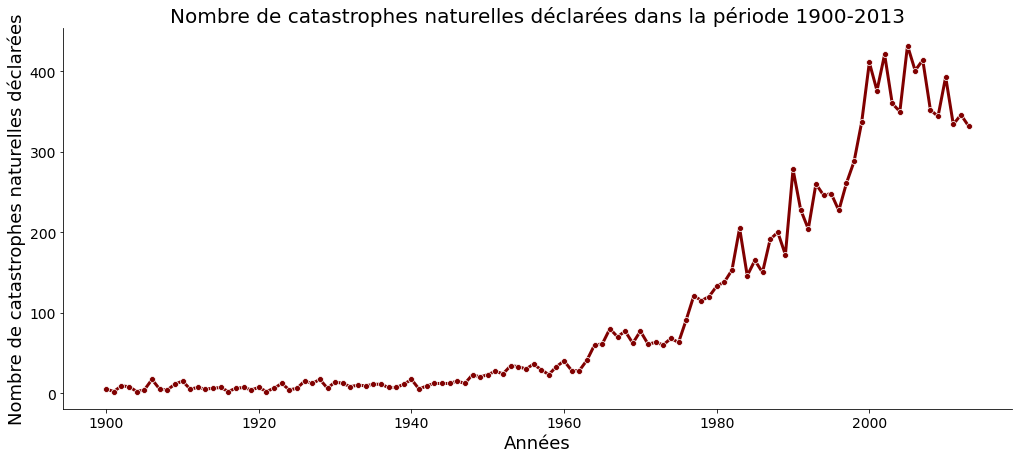

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(style="white", palette="maroon", color_codes=True)


plt.figure(figsize=(17,7))

g = sns.lineplot(df_temperature_VS_catastropes["Year"], 
                 df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"],
                 marker="o", linewidth = 3, markersize = 6, color="maroon")

#plt.plot(df_temperature_VS_catastropes["Year"],
       # df_temperature_VS_catastropes["AverageTemperature"], color='red')
plt.title('Nombre de catastrophes naturelles déclarées dans la période 1900-2013', fontsize = 20)
plt.xlabel('Années', fontsize = 18)
plt.ylabel('Nombre de catastrophes naturelles déclarées', fontsize = 18)
plt.tick_params(labelsize=14)

right_side = g.spines["right"]
right_side.set_visible(False)

top_side = g.spines["top"]
top_side.set_visible(False)

plt.show
plt.savefig("Nombre de catastrophes.png")

# Graphique: Les catastrophes naturelles VS Températures globales annuelles de période 1900 - 2013



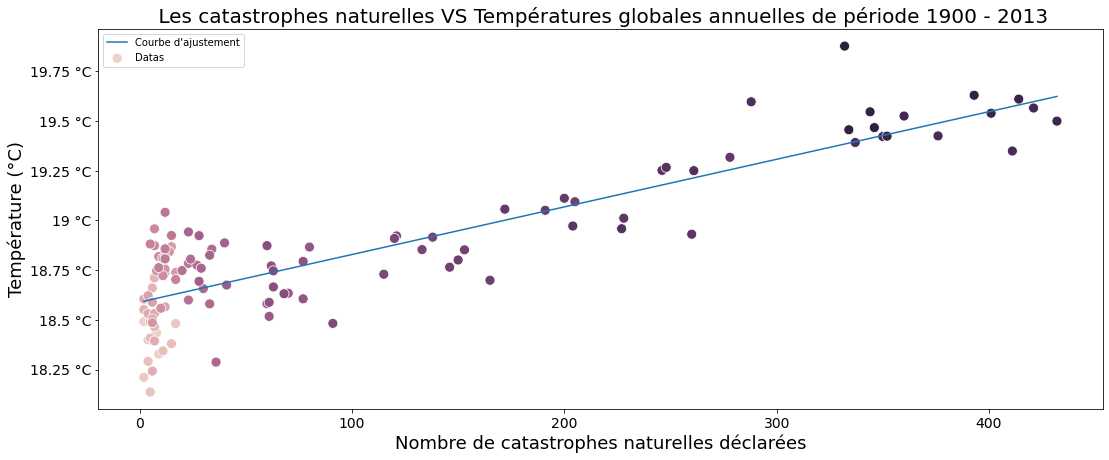

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, ax = plt.subplots(figsize = (18, 7))

ax = sns.scatterplot(x="Number of reported natural disasters (reported disasters)", y="AverageTemperature",
                hue='Year', data=df_temperature_VS_catastropes,
                s=100, legend = False, label='Datas')


from matplotlib.ticker import EngFormatter
ax.yaxis.set_major_formatter(EngFormatter(unit=u"°C"))
ax.set_xlabel("Nombre de catastrophes naturelles déclarées", fontsize=18)
ax.set_ylabel("Température (°C)", fontsize=18)
ax.set_title(" Les catastrophes naturelles VS Températures globales annuelles de période 1900 - 2013", fontsize=20)

ax.tick_params(axis='both', which='major', labelsize=14)

#fit scatterplot
ax.plot(np.unique(df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"]), 
        np.poly1d(np.polyfit(df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"], 
                             df_temperature_VS_catastropes["AverageTemperature"], 1))(np.unique(df_temperature_VS_catastropes["Number of reported natural disasters (reported disasters)"])),
       label = 'Courbe d\'ajustement')
ax.legend(loc = 'upper left')

plt.show()
fig.savefig("TemperatureVScatastrophes.png")


In [0]:
#t = "R^2 = 0.7474"
#fig.text(0.8, 0.5, t, family='serif', style='italic', ha='right', wrap=True, fontsize=18)